In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
import numpy as np
from numpy import sign
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna
# !pip install optuna
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice



In [96]:
def remove_nan_blank(df):
    # Remove rows with NaN values
    df = df.dropna()
    # Replace blank values with NaN
    df = df.replace('', np.nan)
    # Remove rows with NaN values
    df = df.dropna()
    return df

In [97]:
from sklearn.model_selection import train_test_split
path = "/content/drive/MyDrive/Semester_2/ML Lab/Exercise_10/smart_grid_stability_augmented.csv"
# Read the creditcard.csv file
data = pd.read_csv(path)
data = remove_nan_blank(data)

In [98]:
def getData(path):
  data = pd.read_csv(path)
  # binary encoding the labels
  data[data['stabf'] == 'stable'] = 1
  data[data['stabf'] == 'unstable'] = 0
  data['stabf'] = data['stabf'].astype(dtype='int64')
  # Split the data into features and target
  X = data.drop("stabf", axis=1)
  y = data["stabf"]

  # # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return x_train, y_train, x_test, y_test

In [99]:
"""
   This code defines an objective function which is used to optimize the
   parameters of an SVM classifier using Optuna. The objective function uses 
   Optunas trial object to suggest different values for different parameters of 
   the SVM classifier. The parameters being optimized include the regularization 
   parameter C, the kernel type, the degree of the polynomial kernel, the value of 
   coef0, whether or not to use shrinking heuristics, the tolerance for stopping 
   criteria, the maximum number of iterations, the shape of the decision function,
   the class weight, and the random state. The objective function uses cross-validation
   to evaluate the performance of the classifier with the suggested parameter values 
   and returns the mean accuracy.
   """
def objective(trial, x, y):
    C = trial.suggest_float("C", 1e-10, 1e10, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    degree = trial.suggest_int("degree", 1, 10)
    coef0 = trial.suggest_float("coef0", -1, 1)
    shrinking = trial.suggest_categorical("shrinking", [True, False])
    tol = trial.suggest_float("tol", 1e-5, 1e-1)
    max_iter = trial.suggest_int("max_iter", -1, 1000)
    decision_function_shape = trial.suggest_categorical("decision_function_shape", ["ovr", "ovo"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    random_state = trial.suggest_int("random_state", 0, 100)
    classifier_obj = sklearn.svm.SVC(C=C, kernel=kernel, degree=degree, coef0=coef0, 
                                     shrinking=shrinking, tol=tol, max_iter=max_iter, 
                                     decision_function_shape=decision_function_shape, 
                                     class_weight=class_weight, random_state=random_state)
    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

classifier_obj = sklearn.svm.SVC() 
"""
The reason why it has two classifierobj is because one is used in the objective function
as a parameter to optimize, and the other is used outside of the function as a classifier 
object that is trained using the best parameters found during the optimization process. The 
classifierobj in the objective function is defined as an SVC object with various parameters 
that are suggested by Optuna during the optimization process."""

if __name__ == "__main__":
  study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
  # study.optimize(objective, n_trials=100)
  x_train, y_train, x_test, y_test = getData(path)
  func = lambda trial: objective(trial, x_train, y_train)
  study.optimize(func, n_trials=100)
  # To get the dictionary of parameter name and parameter values:
  print("Return a dictionary of parameter name and parameter values:",study.best_params)

  # To get the best observed value of the objective function:
  print("Return the best observed value of the objective function:",study.best_value)

  # To get the best trial:
  print("Return the best trial:",study.best_trial)

  # To get all trials:
  print("Return all the trials:", study.trials)

[I 2023-01-27 21:16:39,316] A new study created in memory with name: no-name-ed982db4-8f44-42b3-8910-002f8394cca5
[I 2023-01-27 21:16:42,656] Trial 0 finished with value: 0.3624583333333333 and parameters: {'C': 3.0557635718363805e-10, 'kernel': 'rbf', 'degree': 7, 'coef0': 0.1462253648812608, 'shrinking': False, 'tol': 0.07420694907278758, 'max_iter': 241, 'decision_function_shape': 'ovr', 'class_weight': 'balanced', 'random_state': 16}. Best is trial 0 with value: 0.3624583333333333.
[I 2023-01-27 21:16:53,510] Trial 1 finished with value: 1.0 and parameters: {'C': 9.34570367113371e-09, 'kernel': 'rbf', 'degree': 8, 'coef0': 0.9636506613007496, 'shrinking': False, 'tol': 0.03181663336762219, 'max_iter': 704, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 67}. Best is trial 1 with value: 1.0.
[I 2023-01-27 21:16:59,709] Trial 2 finished with value: 0.3624583333333333 and parameters: {'C': 8.563052564909156e-09, 'kernel': 'rbf', 'degree': 9, 'coef0': -0.3483934

Return a dictionary of parameter name and parameter values: {'C': 9.34570367113371e-09, 'kernel': 'rbf', 'degree': 8, 'coef0': 0.9636506613007496, 'shrinking': False, 'tol': 0.03181663336762219, 'max_iter': 704, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 67}
Return the best observed value of the objective function: 1.0
Return the best trial: FrozenTrial(number=1, state=TrialState.COMPLETE, values=[1.0], datetime_start=datetime.datetime(2023, 1, 27, 21, 16, 42, 659401), datetime_complete=datetime.datetime(2023, 1, 27, 21, 16, 53, 509952), params={'C': 9.34570367113371e-09, 'kernel': 'rbf', 'degree': 8, 'coef0': 0.9636506613007496, 'shrinking': False, 'tol': 0.03181663336762219, 'max_iter': 704, 'decision_function_shape': 'ovr', 'class_weight': None, 'random_state': 67}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None), 'kernel': CategoricalDistribution(choices=('

In [100]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study)

In [101]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study)

In [102]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
plot_param_importances(study)

In [103]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study)

In [104]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study)

In [105]:
"""Here we will first set the parameters of the classifier_obj to the
best parameters found by the Optuna study, using the set_params() method. 
Then it will fit the classifier_obj to the training data using the fit() method. 
Next, it will use the classifier_obj to make predictions on the test data and store 
the predictions in y_pred. Then it will calculate the accuracy of the classifier_obj 
on the test data by comparing the predictions to the true labels, and print the accuracy. 
Finally, it will generate and print a classification report which includes precision, recall, 
f1-score, and support for each class.
It's important to note that this is an example of using the best parameters to make predictions 
on unseen test data and check the performance of the model on this data."""

classifier_obj.set_params(**study.best_params)
classifier_obj.fit(x_train, y_train)
y_pred = classifier_obj.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
report = sklearn.metrics.classification_report(y_test, y_pred)
print("\nClassification report:\n", report)




Accuracy on test set: 1.0000

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7678
           1       1.00      1.00      1.00      4322

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



In [106]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_C,params_class_weight,params_coef0,params_decision_function_shape,params_degree,params_kernel,params_max_iter,params_random_state,params_shrinking,params_tol,state
0,0,0.362458,2023-01-27 21:16:39.506970,2023-01-27 21:16:42.655636,0 days 00:00:03.148666,3.055764e-10,balanced,0.146225,ovr,7,rbf,241,16,False,0.074207,COMPLETE
1,1,1.000000,2023-01-27 21:16:42.659401,2023-01-27 21:16:53.509952,0 days 00:00:10.850551,9.345704e-09,None,0.963651,ovr,8,rbf,704,67,False,0.031817,COMPLETE
2,2,0.362458,2023-01-27 21:16:53.513717,2023-01-27 21:16:59.708912,0 days 00:00:06.195195,8.563053e-09,balanced,-0.348393,ovo,9,rbf,757,33,True,0.083363,COMPLETE
3,3,1.000000,2023-01-27 21:16:59.712595,2023-01-27 21:17:06.799836,0 days 00:00:07.087241,8.588176e-10,None,0.224720,ovo,2,poly,896,0,True,0.074070,COMPLETE
4,4,1.000000,2023-01-27 21:17:06.802320,2023-01-27 21:17:06.971857,0 days 00:00:00.169537,1.225651e+08,None,0.417655,ovr,9,poly,58,95,False,0.021236,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.000000,2023-01-27 21:20:08.739727,2023-01-27 21:20:11.610596,0 days 00:00:02.870869,4.543037e-08,None,0.238596,ovr,7,poly,479,89,True,0.029825,COMPLETE
96,96,0.637542,2023-01-27 21:20:11.613080,2023-01-27 21:20:14.596110,0 days 00:00:02.983030,2.509262e-07,balanced,0.593231,ovo,4,rbf,709,85,False,0.070619,COMPLETE
97,97,1.000000,2023-01-27 21:20:14.598887,2023-01-27 21:20:14.797833,0 days 00:00:00.198946,1.720702e+07,None,0.628661,ovr,2,linear,661,98,True,0.068256,COMPLETE
98,98,1.000000,2023-01-27 21:20:14.800126,2023-01-27 21:20:15.011622,0 days 00:00:00.211496,6.709857e-07,None,0.917293,ovo,10,poly,633,7,False,0.059884,COMPLETE


In [107]:
type(study.trials_dataframe())
study.trials_dataframe().columns

Index(['number', 'value', 'datetime_start', 'datetime_complete', 'duration',
       'params_C', 'params_class_weight', 'params_coef0',
       'params_decision_function_shape', 'params_degree', 'params_kernel',
       'params_max_iter', 'params_random_state', 'params_shrinking',
       'params_tol', 'state'],
      dtype='object')

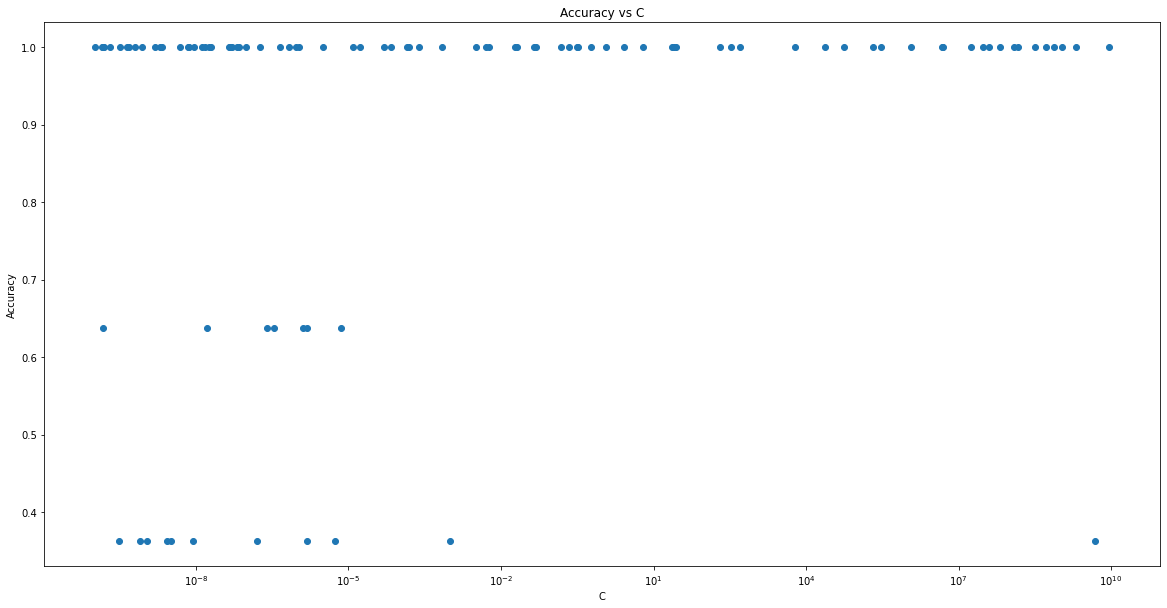

In [108]:
plt.figure(figsize=(20,10))
plt.scatter(study.trials_dataframe()['params_C'], study.trials_dataframe()['value'])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C")
plt.show()

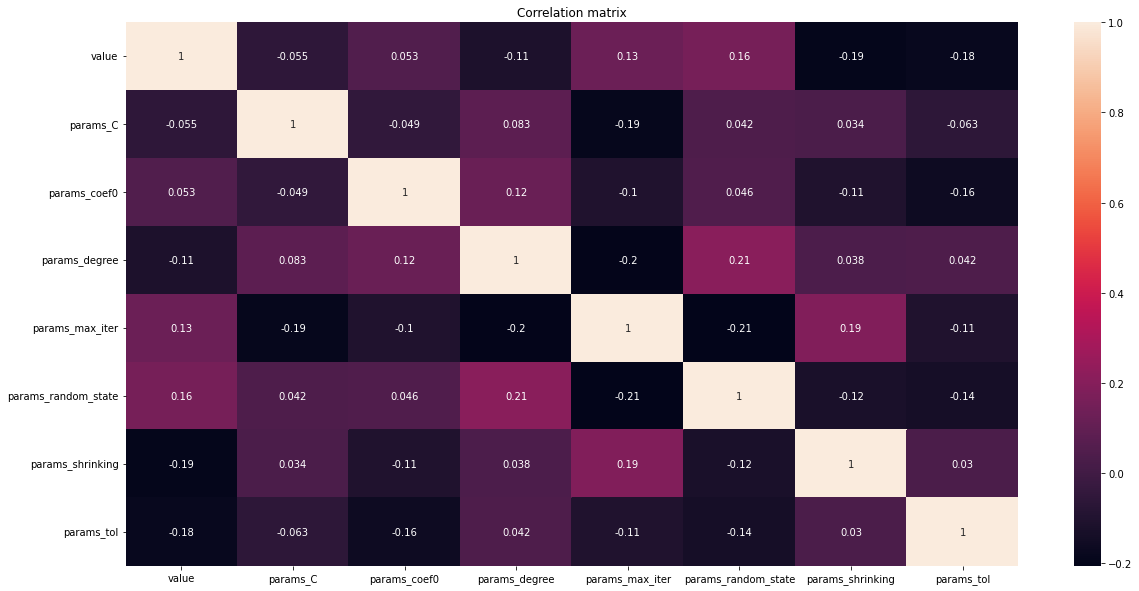

In [109]:
corr = study.trials_dataframe().drop(['number','datetime_start','datetime_complete','duration','state'], axis=1).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)
plt.title("Correlation matrix")
plt.show()